In [1]:
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path = Path(os.getcwd()).resolve().parent

In [3]:
sys.path.append(str(root_path))

In [4]:
from src.utils.auto_importer import AutoImporter, DataFrameDescriber, CompleteDescribeTable, BoxplotVisualizer, ColumnsPlotter

In [5]:
pd.set_option('display.max_columns',500)
# pd.set_option('display.max_rows',500)

In [6]:
df = pd.read_csv("../data/processed/heart_attack_prediction_dataset1_processed.csv")

In [7]:
data = df.copy()

-----------------------------------

In [8]:
boxplots = BoxplotVisualizer(data)

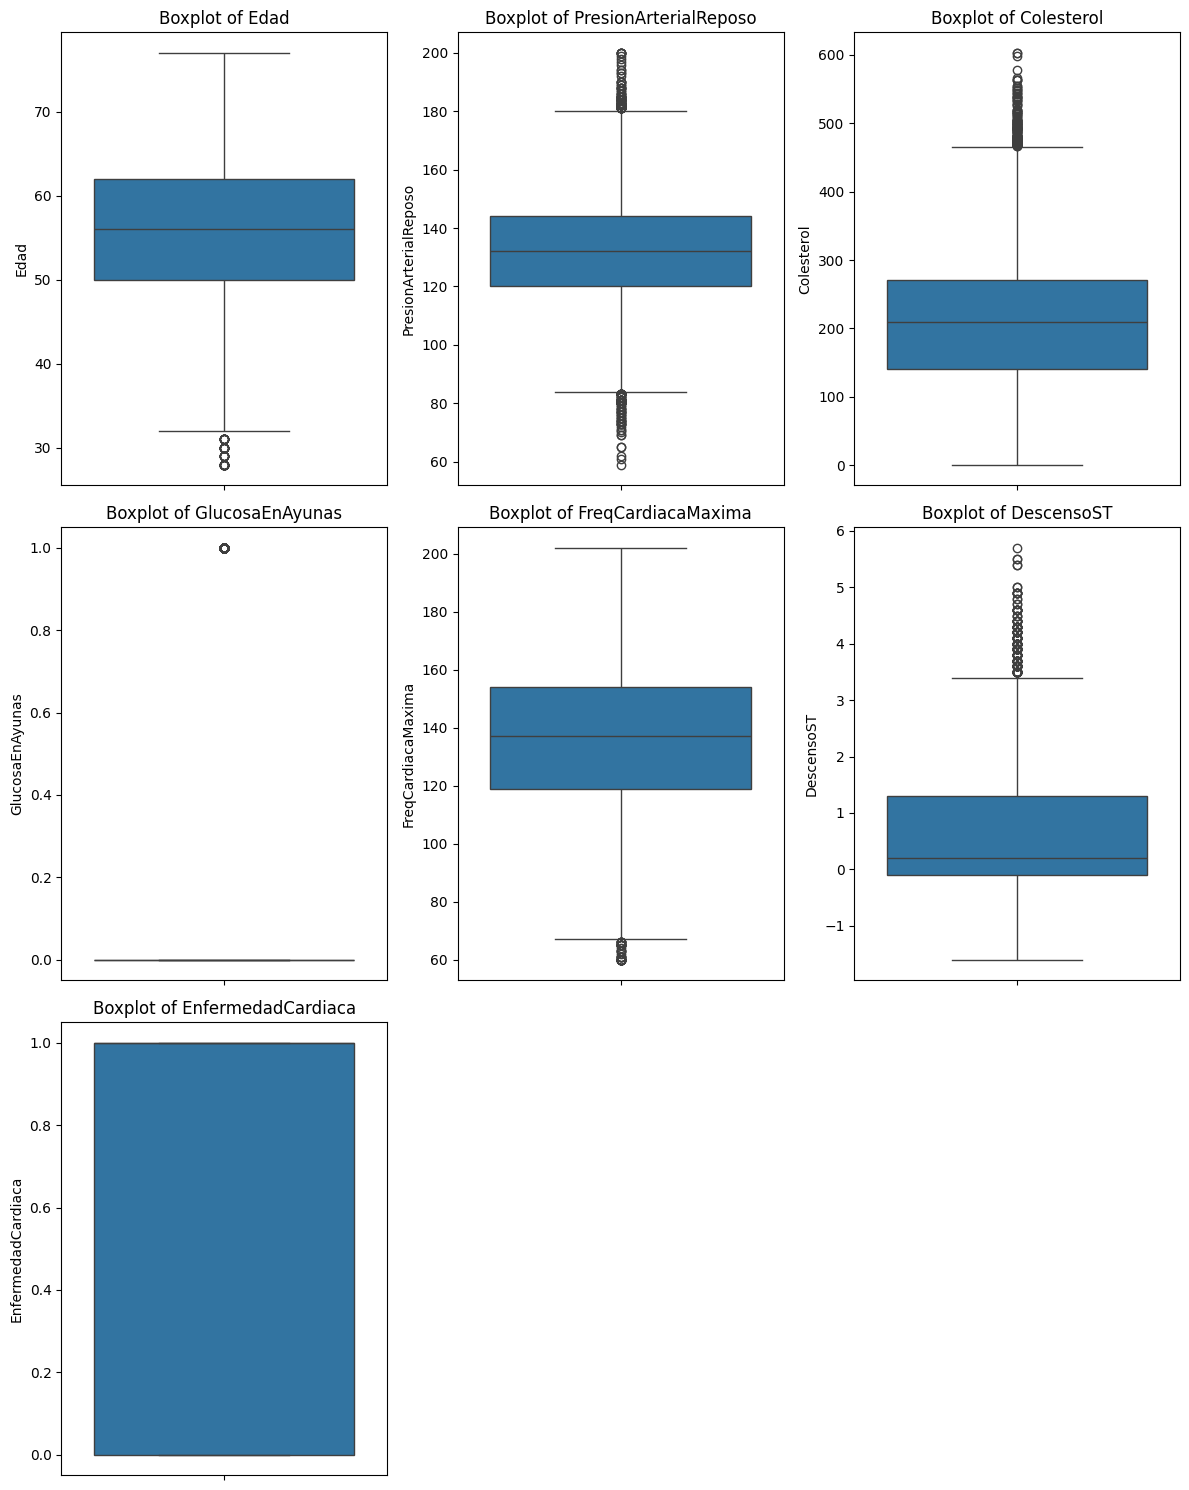

In [9]:
boxplots.generate_boxplots()

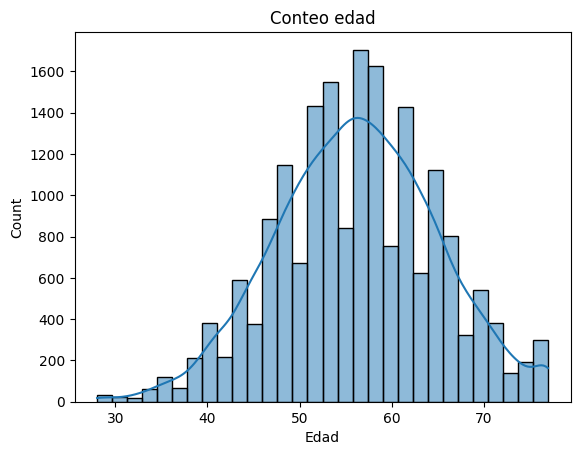

In [10]:
sns.histplot(data, x='Edad', kde=True, bins=30)
plt.title("Conteo edad");

In [11]:
data['Sexo'].value_counts()

Sexo
M    14631
F     3931
Name: count, dtype: int64

Text(0.5, 1.0, 'Conteo genero')

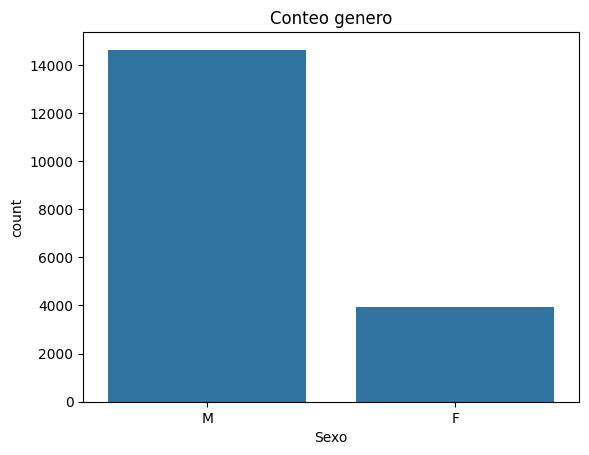

In [12]:
sns.countplot(data, x='Sexo')
plt.title("Conteo genero")

In [13]:
data['TipoDolorTorax'].value_counts()

TipoDolorTorax
ASY    10027
NAP     4090
ATA     3490
TA       955
Name: count, dtype: int64

variavel categorica nominal

asy: assintomatico  
nap: dolor no anginoso  
ata: angina atipica  
ta: angina tipica  

Text(0.5, 1.0, 'Conteo tipo de dolor en el pecho')

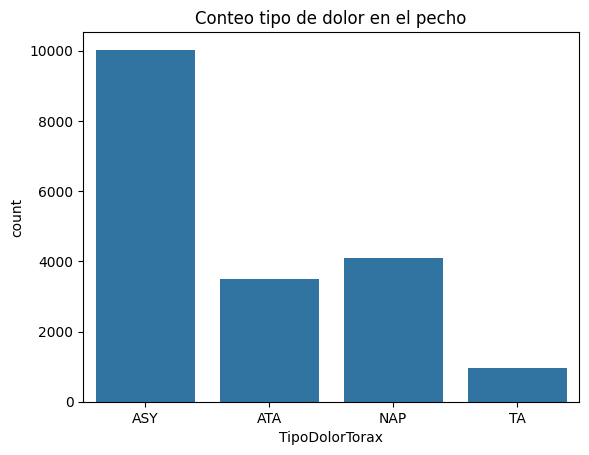

In [14]:
sns.countplot(data, x='TipoDolorTorax')
plt.title("Conteo tipo de dolor en el pecho")

conteo presion sanguinea en reposo (RestingBP) en mmHg(sistolica) variable numerica continua

In [15]:
data['PresionArterialReposo'].value_counts().sort_index()

PresionArterialReposo
59     1
61     1
62     1
65     2
69     2
      ..
196    1
197    1
198    1
199    1
200    6
Name: count, Length: 134, dtype: int64

Text(0.5, 1.0, 'Conteo presión arterial')

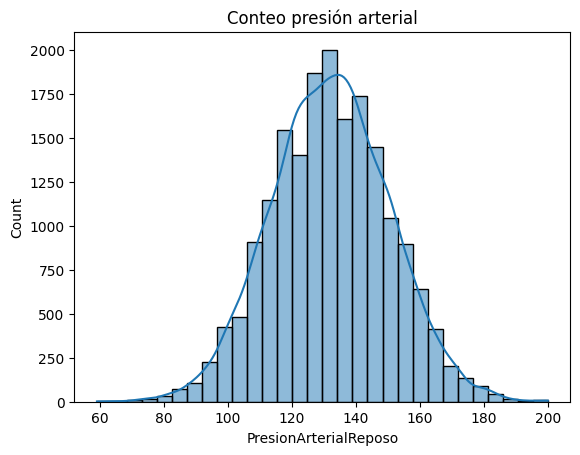

In [16]:
sns.histplot(data, x='PresionArterialReposo', bins=30, kde=True)
plt.title("Conteo presión arterial")

cholesterol  
variable numerica continua

In [17]:
data['Colesterol'].value_counts().sort_index()

Colesterol
1.0      10
2.0      12
3.0      14
4.0      15
5.0       9
         ..
564.0     2
567.0     1
578.0     1
598.0     1
603.0     2
Name: count, Length: 535, dtype: int64

<Axes: xlabel='Colesterol', ylabel='Count'>

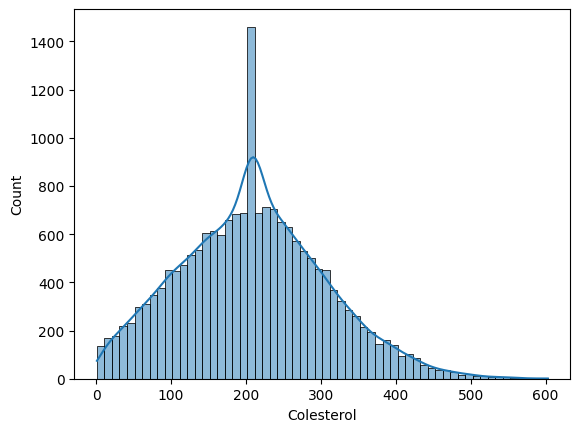

In [18]:
sns.histplot(data, x='Colesterol', bins=60, kde=True)

variable categorica ordinal

fasting bs = azucar nel sangre en digiuno  
0 : fasting bs < 120 mg/dl - no diabetico  
1 : fasting bs >= 120 mg/dl - diabetico 

Text(0.5, 1.0, 'Conteo categoria diabeticos')

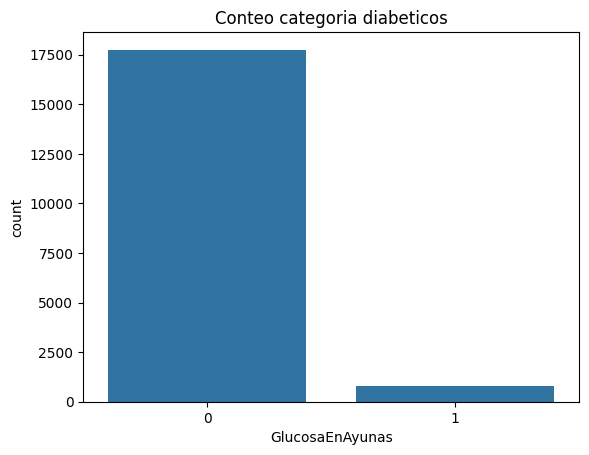

In [19]:
sns.countplot(data, x='GlucosaEnAyunas')
plt.title("Conteo categoria diabeticos")

restingECG - eletrocardiograma en reposo  
variable categorica nominal

In [20]:
data['ECGReposo'].value_counts()

ECGReposo
Normal    11169
LVH        3833
ST         3560
Name: count, dtype: int64

normal: normal  
lvh : hipertrofia ventricular izquierda  
st : anormalidad de la onda ST-T

Text(0.5, 1.0, 'Conteo ECG')

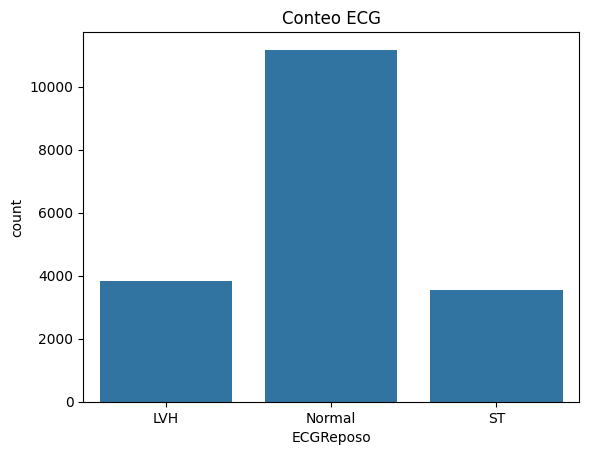

In [21]:
sns.countplot(data, x='ECGReposo')
plt.title("Conteo ECG")

nax HR (frecuencia cardiaca max)  
variable

In [22]:
data['FreqCardiacaMaxima'].value_counts().sort_index()

FreqCardiacaMaxima
60      27
61       5
62       1
63       4
64       1
      ... 
198     14
199      6
200     11
201     14
202    103
Name: count, Length: 143, dtype: int64

Text(0.5, 1.0, 'Conteo batimentos cardiacos')

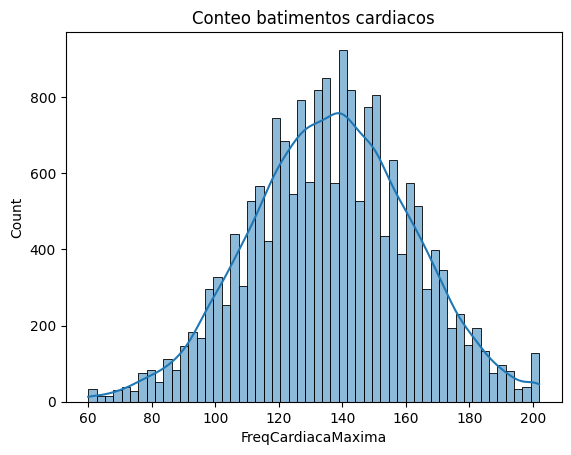

In [23]:
sns.histplot(data, x='FreqCardiacaMaxima', kde=True)
plt.title("Conteo batimentos cardiacos")

angina en ejercicio = angina induzida por ejercicio
variable categorica nominal  
Y: cuando la persona presenta problemas de dolor en el pecho durante el ejercicio fisico  
N: el reves

In [24]:
data['AnginaDeEsfuerzo'].value_counts()

AnginaDeEsfuerzo
N    11098
Y     7464
Name: count, dtype: int64

In [25]:
piechart = data['AnginaDeEsfuerzo'].value_counts()

Text(0.5, 1.0, 'Percentual N y Y')

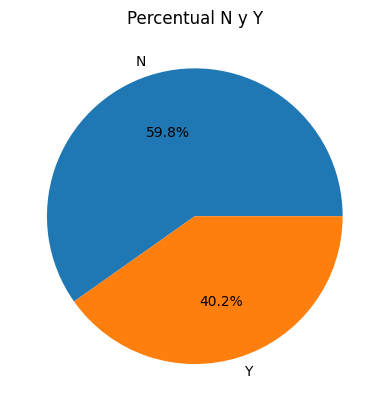

In [26]:
plt.pie(piechart.values, labels=piechart.index, autopct='%1.1f%%');
plt.title("Percentual N y Y")

oldpeadk  
depresion de st induzida por ejercicio  
variable numerica continua 

In [27]:
data['DescensoST'].value_counts().sort_index()

DescensoST
-1.6     2
-1.5     5
-1.4    13
-1.3    31
-1.2    36
        ..
 4.9     6
 5.0     2
 5.4     2
 5.5     2
 5.7     1
Name: count, Length: 70, dtype: int64

<Axes: xlabel='DescensoST', ylabel='Count'>

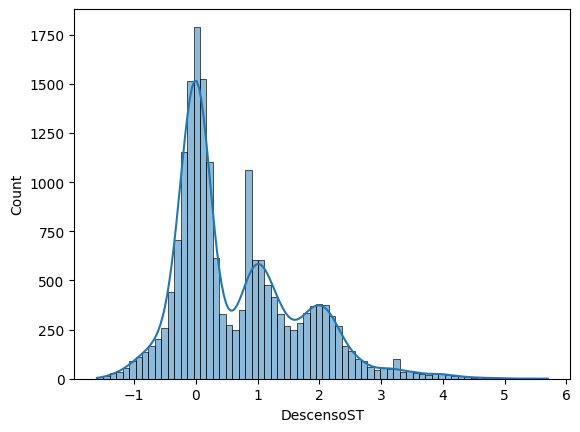

In [28]:
sns.histplot(data, x='DescensoST', kde=True)

st slope = inclinacion del segmento st  
variable categorica nominal

In [29]:
data['PendienteST'].value_counts()

PendienteST
Flat    9301
Up      8033
Down    1228
Name: count, dtype: int64

In [30]:
piechart = data['PendienteST'].value_counts()

Text(0.5, 1.0, 'Inclinacion ST')

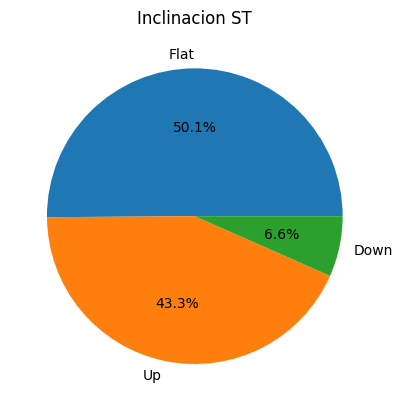

In [31]:
plt.pie(piechart.values, labels=piechart.index, autopct='%1.1f%%');
plt.title("Inclinacion ST")

heart disease = target (doenca cardiaca)  
0: no hay doenca cardiaca
1:  hay doenca cardiaca
variable 

In [32]:
data['EnfermedadCardiaca'].value_counts()

EnfermedadCardiaca
1    10019
0     8543
Name: count, dtype: int64

In [33]:
piechart = data['EnfermedadCardiaca'].value_counts()

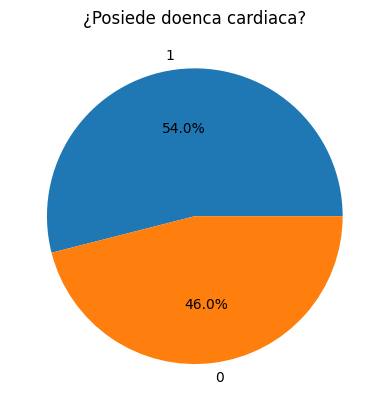

In [34]:
plt.pie(piechart.values, labels=piechart.index, autopct='%1.1f%%');
plt.title("¿Posiede doenca cardiaca?");